In [1]:
#installing the package for HAAR cascade file
!pip install git+git://github.com/PnS2019/pnslib.git

  Cloning git://github.com/PnS2019/pnslib.git to /tmp/pip-req-build-46b89au1
  Running command git clone -q git://github.com/PnS2019/pnslib.git /tmp/pip-req-build-46b89au1
  Created wheel for pnslib: filename=pnslib-0.1.0a1-cp36-none-any.whl size=1489618 sha256=0684295c928381a0ba225f254971367ba337815b08535e7ca352c63b668d73dd
  Stored in directory: /tmp/pip-ephem-wheel-cache-l6eppfig/wheels/a2/8e/a9/c62e72840009deaa723b3a113d5c3b90acac77098d16e90eca
Successfully built pnslib


In [2]:
#mount the google drive
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
'6 Reviewer Details.docx'  'image processing'   toc.rar
'6 Reviewer Details.gdoc'   other.jpg	        Vikas.pdf
 blockchain		    photon.jpg	       'vikas_resume(2).pdf'
'Colab Notebooks'	    Project	       'vikas resume.pdf'
 Datasets		    signn.jpg	       'Vikas Resume.pdf'
'Getting started.pdf'	    test1.gsheet        yolov3


In [3]:
#capture the image by webcam
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
     // const capture = document.createElement('button');
      //capture.textContent = 'Capture';
      //div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      //await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

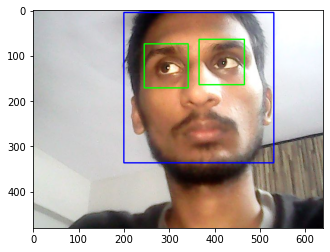

In [24]:
#importing the require package
import cv2
from pnslib import utils
import matplotlib.pyplot as plt
from IPython.display import Image


filename = take_photo()
  # read image
img = cv2.imread("photo.jpg")

# load face cascade and eye cascade
face_cascade = cv2.CascadeClassifier(
     utils.get_haarcascade_path('haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier(
    utils.get_haarcascade_path('haarcascade_eye.xml'))

# search face
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#choose value for better detction
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

#make rectangle on interseted area
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#show the detetcted image
plt.figure(1)
plt.imshow(img)
plt.show()
plt.close()
